In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
import seaborn as sns

In [6]:
sns.set_style("white")

In [7]:
from sklearn.datasets import make_blobs

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
from sklearn.ensemble import RandomForestRegressor

# Decision Trees

So Luke says (to paraphrase) “Think about diving into decisions trees. They’re easy to understand 
and provide a great jumping off point for understanding more complex algorithms”. So here we are, 
understanding decision trees (and Random Forests(TM), since they go well together) and working with 
blobs to play with the concept.

It seems that, when thinking first about classification, Random Forests are a classic example of 
an ensemble learning method. This trademarked method works by grouping together an ensemble of many weak learners 
(decision trees). The mechanics of implementing them in scikit-learn and Python will be one of the 
challenges taken on with this project. It really seems like there are probably not going to be too 
many times when a decision tree would need to be implemented by itself instead of along with a Random 
Forest or some other ensemble method. Recognition of that is the why behind working with both (i.e. - 
solo decision trees as well as the Random Forest ensemble method) in this project.

-------


To start with decision trees, it seems that the “more modern” term for them is Classification and 
Regression Trees (CART) and they work by using binary splitting to make decisions based on 
features (like “Is Mahogany cool - Yes or No? Ok, how cool is she - Kinda Cool or Amazingly Cool?” 
and so on).

To play more with the algorithm and the concept in general, some random data will be 
created using some built-in functions in scikit-learn for bringing up a fake dataset. That will start 
below, when the "make_blobs" function from the sklearn.datasets will be put to use. X and y will be set 
equal to "make_blobs". The total number of samples will be set equal to "500". Having there be 4 centers will 
make it so that there are 125 samples per center. Random state will be set to "5" for making it easier to 
share results. If the standard devision were to be set too low, then the clusters would be completely 
separate and it would be difficult to get a feel for the algorithm. If it were too high of a standard 
devision, there would not be actual clusters (more like blobs in the true sense of the word… 
experience talking). In that situation, it would be hard to tell what the actual results look like. 
So the standard deviation will be set to 2.5.

In [11]:
X, y = make_blobs(n_samples = 500, centers = 4, random_state = 5, cluster_std = 2.5)

To make a scatterplot below, the figure size will be set to a 12 by 12. Then, it will pull the 0 
and 1 axis from the X information. Then c will be set to "y" because y represents the labels here.  The size will 
be set equal to "65" for aesthetic reasons. Similarly, transparency, color map choice, border removal, and axis limits will all be carried out in consideration of aesthetics.

(-15, 15)

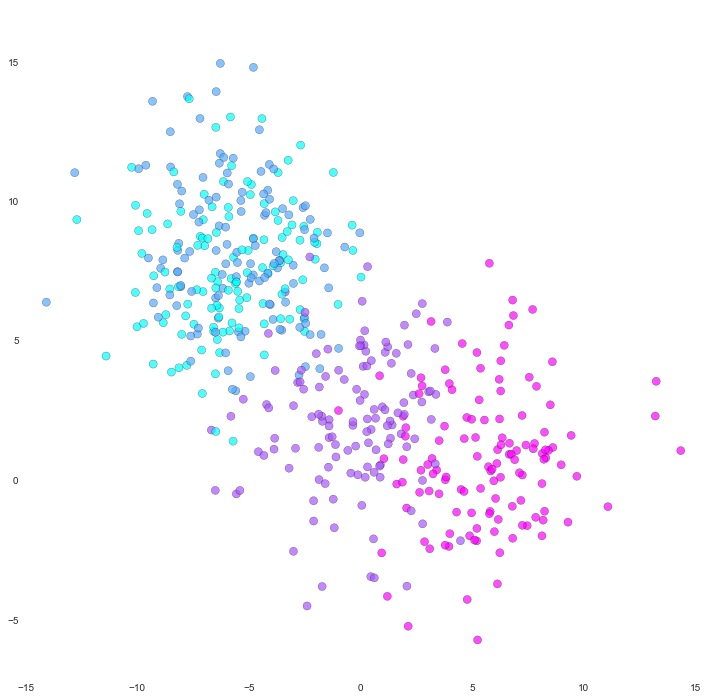

In [12]:
plt.figure(figsize = (12, 12))
plt.scatter(X[:, 0], X[:, 1], c = y, s = 65, alpha = 0.7, cmap = "cool")         # "Cool", like Mahogany
sns.despine(left = True, bottom = True)         # Removes the remaining borders
plt.ylim(-7, 17)         # Restricts range of y axis from -7 to +17
plt.xlim(-15, 15)         # Restricts range of y axis from -15 to +15

It seem that a common technique used a lot in the scikit-learn documentation is mesh grid plotting with decision boundaries. With that in mind, creating a function to plot out the decision boundaries using a mesh grid will be the next step before beginning to implement the decision tree. It will be a visualization function named “visualizeTree” that will take in a classifier model. It will also take in the X (features), the y (labels/target), a boolean - “boundaries” (which basically will tell it whether or not to draw the actual boundaries), and then optional x and y limits (none will be given).

The specifics of the visualization function will be broken down below:

In [13]:
def visualizeTree(classifier, X, y, boundaries = True, xlim = None, ylim = None):
     
    
    classifier.fit(X, y)
             
        
    '''
    Above, the X and y data were fit to the tree by taking the classifier and fitting it to
    X and y.

    Below, the X and y limits will be automatically set to the data in a tuple. It will grab 
    the minimum, say “- 0.1”, then grab the maximum on that column and then say “+ 0.1” and 
    then same thing will happen with setting the y limit (which will differ from the x in that 
    it will be defined by the second feature column). 
    '''
    
    
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)
    
    
    '''
    Next, there will be some tuple unpacking to assign the x minimum and x maximum variable then 
    the y minimum and y maximum variable. 
    '''
    
    
    xMin, xMax = xlim
    yMin, yMax = ylim
    
    
    '''
    The mesh grid will be set up below. 100 points will be linearly spaced from xMin to xMax, 
    then the same from yMin to yMax. And tuple unpacking will be used to make this an xx, yy.
    '''
    
    
    xx, yy = np.meshgrid(np.linspace(xMin, xMax, 100),
                         np.linspace(yMin, yMax, 100))
    
    
    '''
    Below will just be plotting. The figure size will be set to 11 by 11.
    '''
    
    
    plt.figure(figsize = (11, 11))
    
    
    '''
    Next, the details of the the scatterplot of the training points will be given. Many of the 
    details will be aesthetics. Then, below that, the limits will be set.
    '''
    
    
    plt.scatter(X[:, 0], X[:, 1], c = y, s = 75, cmap = "Spectral_r", alpha = 0.6) 
    sns.despine(left = True, bottom = True)
    

    plt.xlim(xMin, xMax)
    plt.ylim(yMin, yMax)        
    
    def plotBoundaries(i, xlim, ylim):

        '''
        The details below will be for plotting the decision boundaries.
        '''

        if i < 0:
            return

        tree = classifier.tree_    # Shorter variable name
        
        '''
        The nodes of the tree will be gone through recursively to plot out the boundaries.
        '''
        
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, "-k", alpha = 0.7)
            plotBoundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plotBoundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], "-k", alpha = 0.7)
            plotBoundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plotBoundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    ''' 
    Below deals with the difference between plotting a single tree or many trees.
    '''
    
    if boundaries:
        plotBoundaries(0, plt.xlim(), plt.ylim())

Below, the classifier “clf” will be set equal to “DecisionTreeClassifier()” with a maximum depth of 2 and a “random_state” of 0 (so no randomness). After that, the tree will be visualized by passing the classifier, the features, and the labels. Boundaries will be seen in a transparent black.

In [14]:
clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)

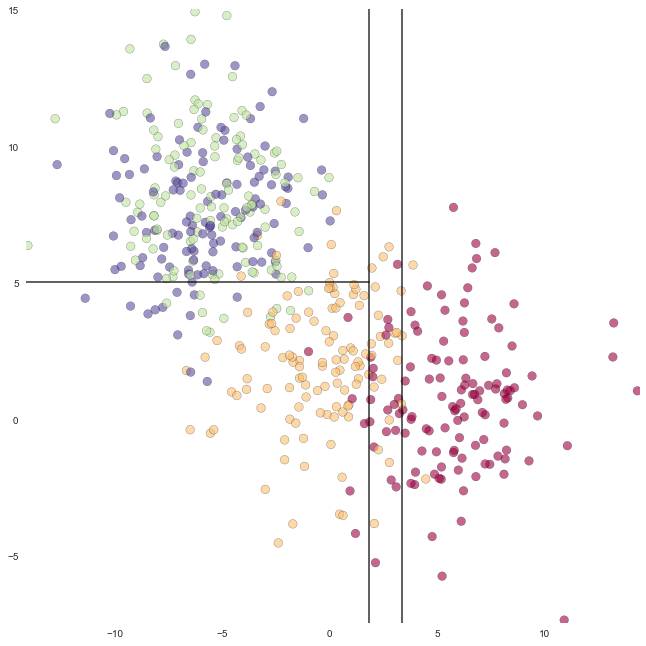

In [15]:
visualizeTree(clf, X, y)

The mesh grid was used to see what the decision tree got right and what it got wrong. The maximum depth was set at 2 deep (not very deep). Still though, the decision tree was able to evaluate different areas, decide how it would label things, and then isolate predictions into zones (i.e. - within the transparent black lines).


Changing the depth would cause the boundaries to change substantially (tends to translate to being - more depth means more lines, means more zones, all smaller zones). Also, increasing the depth can have the potential to introduce overfitting, with results becoming more influenced by noise instead of just signal along. In that event, that is why the boundaries would become smaller and smaller (they would be picking up the noise), ultimately leveling off in a situation where each individual data point (as well as each perceived data point) would be perfectly fit. So overfitting is something to stay aware of because it seems that that tends to be a common issue with decision trees (and likely can be with Random Forests as well).


The issue of overfitting could be addressed by creating an ensemble of decision trees. The reason behind that is because ensemble methods essentially average the results of the many individual estimators that overfit the data. Strangely, the resulting estimates of ensembles tend to be much more robust and accurate than the individual estimates that make them up (in a somewhat “wisdom of the crowd” sort of way). The Random Forest method, which was developed by [Leo Breiman and Adele Cutler](https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm) seems to be the most commonly used. This method seems quite common amongst [Kaggle competition winning](https://www.kaggle.com/wiki/Algorithms) entries as well.


In [16]:
def randForest(classifier, X, y, boundaries = True, xlim = None, ylim = None):
    
    '''
    The particulars are the same as above, except there are Z variables added to color 
    the mesh grid.
    '''
     
    classifier.fit(X, y)

    
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    xMIn, xMAx = xlim
    yMIn, yMAx = ylim
    
    xx, yy = np.meshgrid(np.linspace(xMIn, xMAx, 100),
                         np.linspace(yMIn, yMAx, 100))
    
    '''
    Below Z will be defined by the prediction information so that it can be used to color in the 
    mesh grid. There is a Numpy function that allows for the mesh grid to be put into the correct 
    array form for the predict classifier to be able to color the grid in using the predictions. 
    In order to put the predict classifier to use, “c_” will be used to put in the mesh grid in 
    the correct array form. After that, Z will be reshaped based on the mesh grid. 
    '''
    
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(11, 11))
    plt.pcolormesh(xx, yy, Z, alpha=0.3, cmap = "Pastel1_r")    #Set the color overlay
    

    plt.scatter(X[:, 0], X[:, 1], c = y, s = 75, cmap = "Spectral_r", alpha = 0.6)
    

    plt.xlim(xMIn, xMAx)
    plt.ylim(yMIn, yMAx)        
    
    def plotBOundaries(i, xlim, ylim):

        if i < 0:
            return

        tree = classifier
        
        if tree[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plotBOundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plotBOundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plotBOundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plotBOundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    if boundaries:
        plotBOundaries(0, plt.xlim(), plt.ylim())


To plot out the colored-in mesh grid, the classifier will be set to “RandomForestClassifier()”. Then, the parameter “n_estimators” will set the number of estimators at "100" to define how many trees should go into the forest. Lastly, it will me told to not seed any randomness.

In [17]:
clf = RandomForestClassifier(n_estimators = 100, random_state = 0)    # No randomness

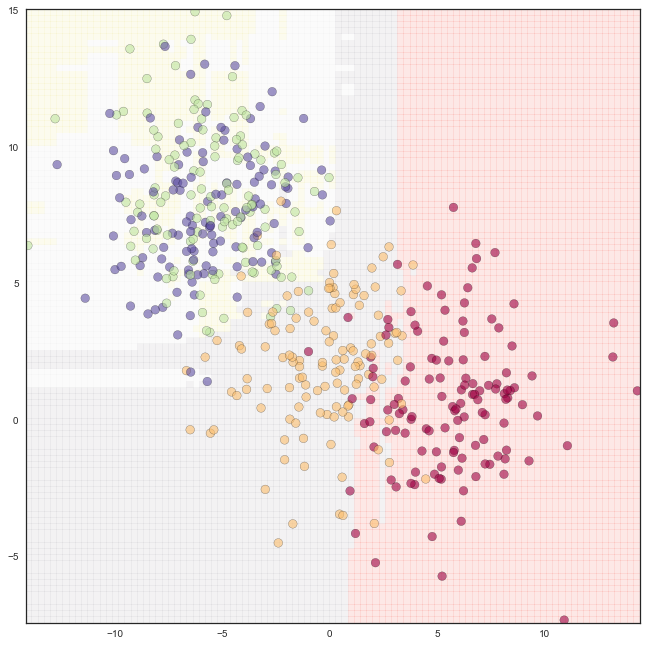

In [18]:
randForest(clf, X, y, boundaries = True)

The Random Forest was able to pick up features that the decision tree was not able to. 

--------

Perhaps a better way to evaluate the model would be to do a train_test_split that would compare a decision tree to a Random Forest. With that thinking in mind, next, train_test_split will be used on the blobs data. Afterwards, there will be a check of the differences in the accuracy of the decision tree versus the entire Random Forest classifier. 

In [19]:
import sklearn

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
from sklearn.cross_validation import train_test_split

In [22]:
logReg = LogisticRegression()

In [23]:
XTrain, XTest, YTrain, YTest = sklearn.cross_validation.train_test_split(X, y, test_size = 0.4, random_state = 3)

In [24]:
logReg.fit(XTrain, YTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
from sklearn import metrics

In [26]:
YPred = logReg.predict(XTest)

In [27]:
print (metrics.accuracy_score(YTest, YPred))   # Checking the accuracy 

0.665


Random Forest regression will be done next, to allow for really interesting practice of it being used for regression instead of classification. More random data will be produced as a way to imagine that there is some sort of weather data or data on carbon dioxide levels in the atmosphere or some other sort of data that may be sinusoidal in nature.

A situation will be set up where there is data to work with that has a slow oscillation component, a fast oscillation component, and also a random noise component as fuel for the regression.

The fake data will be created to begin. Function x will be set equal to "7" multiplied by numpy.random.rand() with "100" passed through (to indicate that it should generate 100 random numbers). The rest will be detailed below.

In [28]:
x = 7 * np.random.rand(100)

'''
The function “sinModel” will take the random numbers that were just generated and make the 
false sinusoidal data using them. Below, “sinModel()” will take in two parameters - the x 
and a 0.2 sigma parameter (that sigma parameter will be the random noise).
'''

def sinModel(x, sigma = 0.2):
    
    noise = sigma * np.random.randn(len(x))   #  x length inserted here instead of a number to stay flexible if x changes

    return np.sin(5.5 * x) + np.sin(0.5 * x) + noise   # Slower 1st component, then 2nd one w/ faster oscillation, then a noise component


Below, the sine model function will be called and plotted to see what it looks like. An errorbar figure will be used just to show the trend a bit better. 

<Container object of 3 artists>

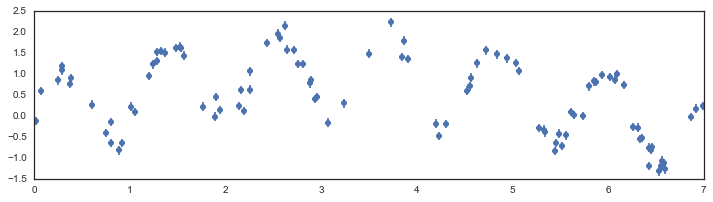

In [29]:
y = sinModel(x) 

plt.figure(figsize = (12, 3))
plt.errorbar(x, y, 0.1, fmt = "8")

The sinusoidal pattern is apparent above. There’s one faster oscillation (the half times sine one) as well as a general trend - a larger curve with a slower oscillation (the 5.5 times sine one).

--------

Next, a Random Forest regressor will be used to create a fitted regression. Since this data is something similar to working with weather pattern data, it does not allow for the use of a standard linear regression approach. The point here is that, not knowing anything about the true nature of the model makes it difficult to fit a polynomial or sinusoidal regression - it would be pretty tedious to try to fit something like that perfectly without knowing the specifics of the data. The Random Forest regressor can help with solving a problem like that one. The reason is because it makes it possible to be able to fit a regression model to data even if very little is known about the true nature of the data. 

To get started, some [evenly-spaced x points](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) will be created below - "999" of them (a number chosen, in part, to help keep written references clear) will be created. 

In [30]:
xFit = np.linspace(0, 10, 999)

Below, a model named rFr will be set equal to “randomforestregressor()” with the argument "95" (another number chosen, in part, to help simplify future referencing) passed to indicate the number of estimators.


In [31]:
rFr = RandomForestRegressor(95)

A model will be fitted to the original "x" data below. In order to format that correctly, it will be passed in a way that will tell the model that the "y" fit terms will be equal to the prediction off of it based on the "x" fit terms. Said differently, the array for "y" will be formatted with "[:, None]". 

In [32]:
rFr.fit(x[:, None], y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=95, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

Next, the predicted points ("yFit") will be set and the real points too ("yTrue"). Simply, "yFit" will be fit to the data that **is** known and then the prediction will be made off of the data that **is not** known (i.e. - the "xFit" data) to create something that will basically be the 999 points versus the fitting on the 95 points.

The model will be plotted after the below prep work. And, since the real model **is** known, it will be possible to plot the data out against the real model as a way to visually compare the results. To set the real points with the model function, "yTrue" will be set equal to "sinModel" "xFit" along 0.  

In [33]:
yFit = rFr.predict(xFit[:, None])

yTrue = sinModel(xFit, 0)

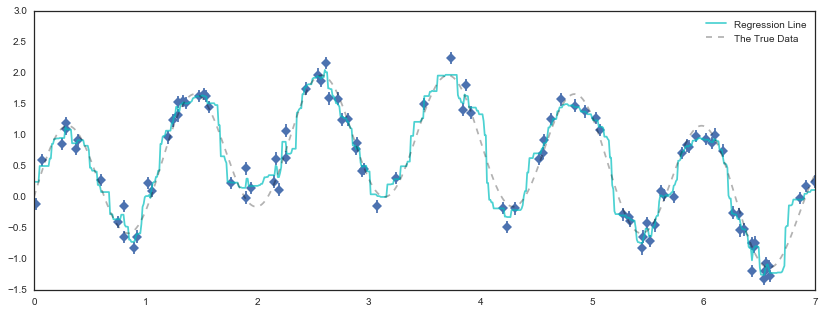

In [34]:
# A lot of these plot decisions relate to improving visual clarity so that the differences can be seen more easily.
plt.figure(figsize = (14, 5))
plt.errorbar(x, y, 0.1, fmt = "D")
plt.plot(xFit, yFit, "-c", alpha = 0.7, label = "Regression Line");
plt.plot(xFit, yTrue, "--k", alpha = 0.3, label = "The True Data");
plt.xlim(0, 7)         # restricts range of y axis from 0 to +7
plt.ylim(-1.5, 3)         # restricts range of y axis from -1.5 to +3
plt.legend(loc = "upper right");


	The solid light blue line represents the fitted data. That visually displays the regression. 

	The dashed gray line represents the x-fitted versus the y-true as a way to display the true data visually. 

	The blue dots are the original data points.


The true data was "x" data fitted onto the model with no sigma (no noise). The "yTrue" was basically just the two terms “np.sin(5.5 * x) + np.sin(0.5 * x)” from earlier - Numpy sine with the slow oscillation versus the fast oscillation. Said differently, "yTrue" was the addition of those two sine terms. The blue points do have a little bit of noise on them (because noise was added to them earlier in the project). 

What is interesting about the regression line (the light blue line) is that it is fit very well (considering, not much was known about the data, so it was not possible to tell the regressor much about the data). The Random Forest regressor could not have known that the data was sinusoidal since, all it had to work from were simply the points that it was given. It is impressive that, despite that absence of context, it was still able to come up with a very similar pattern to the true data. This provides a tradeoff and a balance where a simple model can be used (to imprecise means, but still providing effective help) at times when it is hard to know what the data being worked with actually looks like.